### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [54]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. 

In [55]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
whale_navs = pd.read_csv(
    Path('Resources/whale_navs.csv'),
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True
)

# Review the first 5 rows of the DataFrame
whale_navs.head()    

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index.

In [56]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values, copy nex DataFrame.
daly_returns_df = whale_navs.pct_change().dropna().copy()

# Review the first five rows of the daily returns DataFrame.
daly_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500.

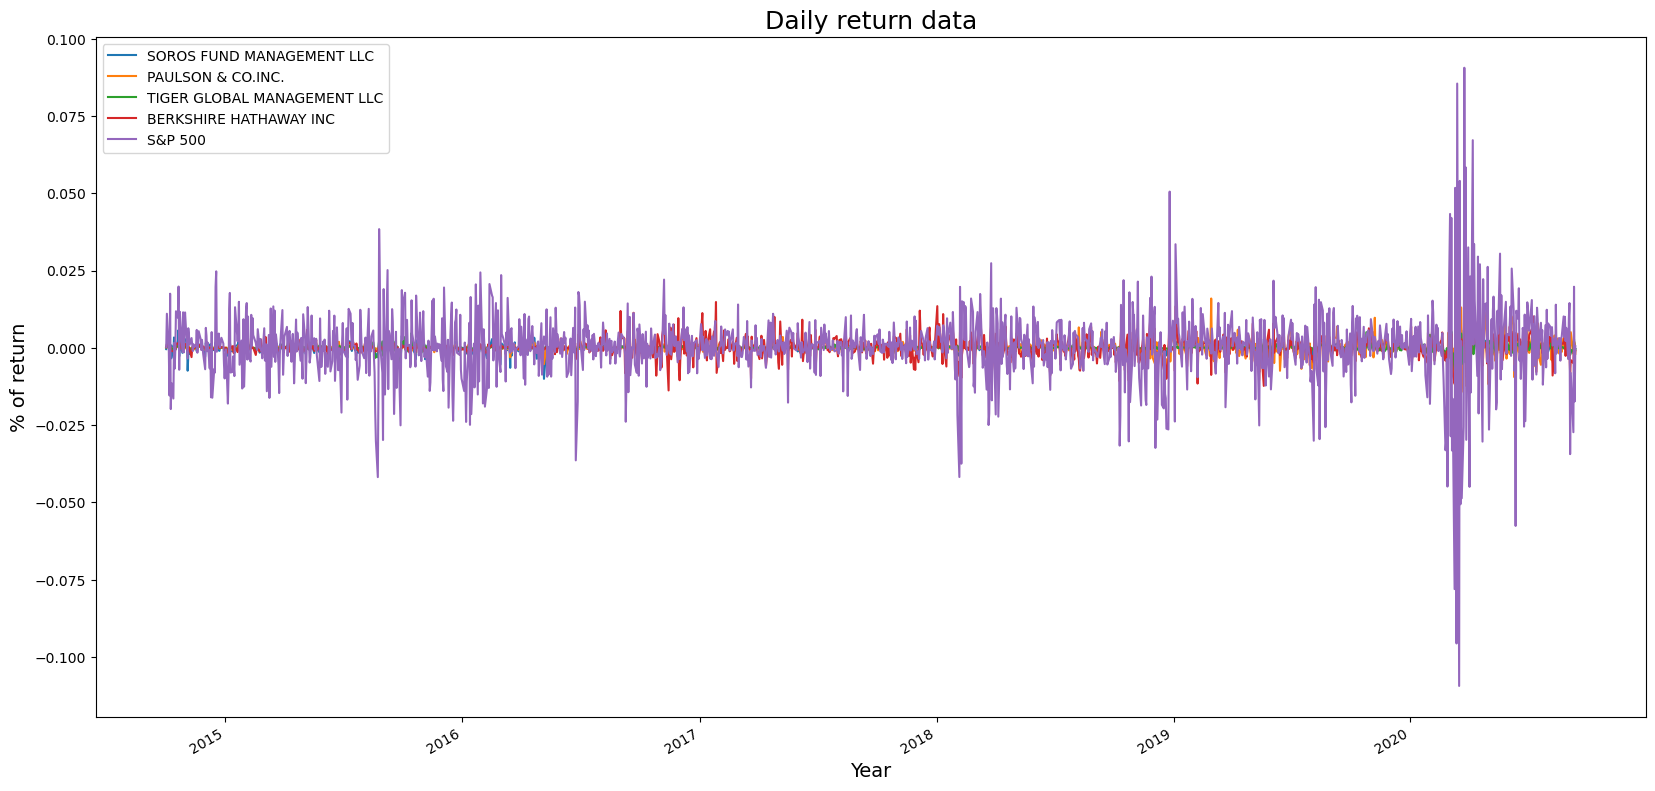

In [57]:
# Plot the daily return data of the 4 funds and the S&P 500 
ax = daly_returns_df.plot(
        title="Daily return data", 
        figsize=(20,10)
)

# Set titles and labels with initial sizes
ax.title.set_size(18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('% of return', fontsize=14);

#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500.

In [58]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
daly_returns_cumulative_df = (1+daly_returns_df).cumprod()

# Review the last 5 rows of the cumulative returns DataFrame
daly_returns_cumulative_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the Pandas `plot` function to visualize the cumulative return values for the four funds and the S&P 500 over time. 

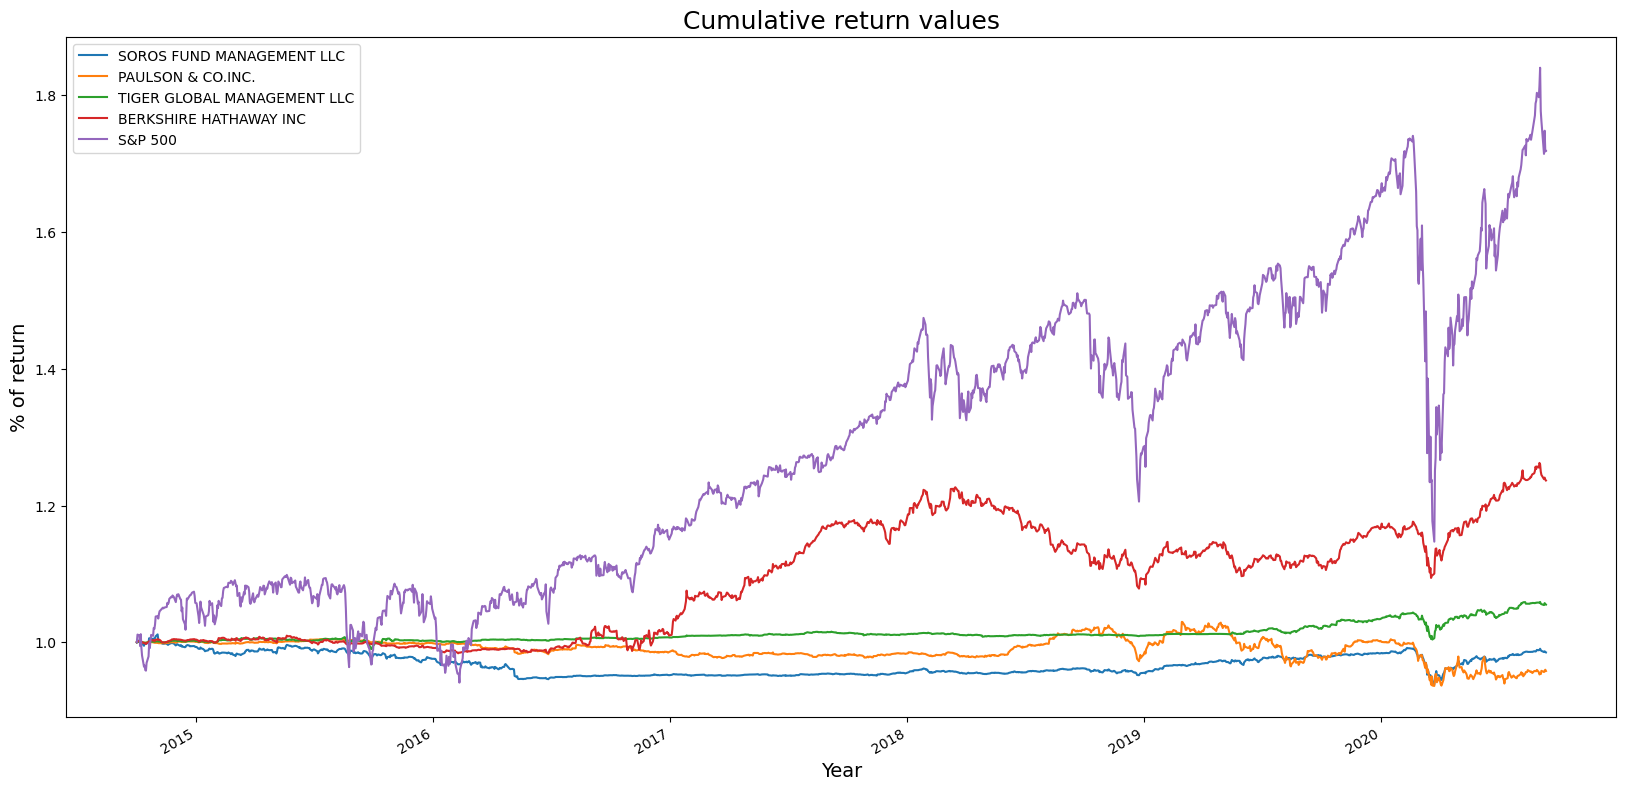

In [59]:
# Visualize the cumulative returns using the Pandas plot function
ax = daly_returns_cumulative_df.plot(
        title="Cumulative return values",
        legend=True,
        figsize=(20,10)
)

# Set titles and labels with initial sizes
ax.title.set_size(18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('% of return', fontsize=14);

#### Step 4: Answer the following question:

**Question :** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer :** The analysis of cumulative return data indicates that the S&P 500 Index outperformed the other four fund portfolios.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. 

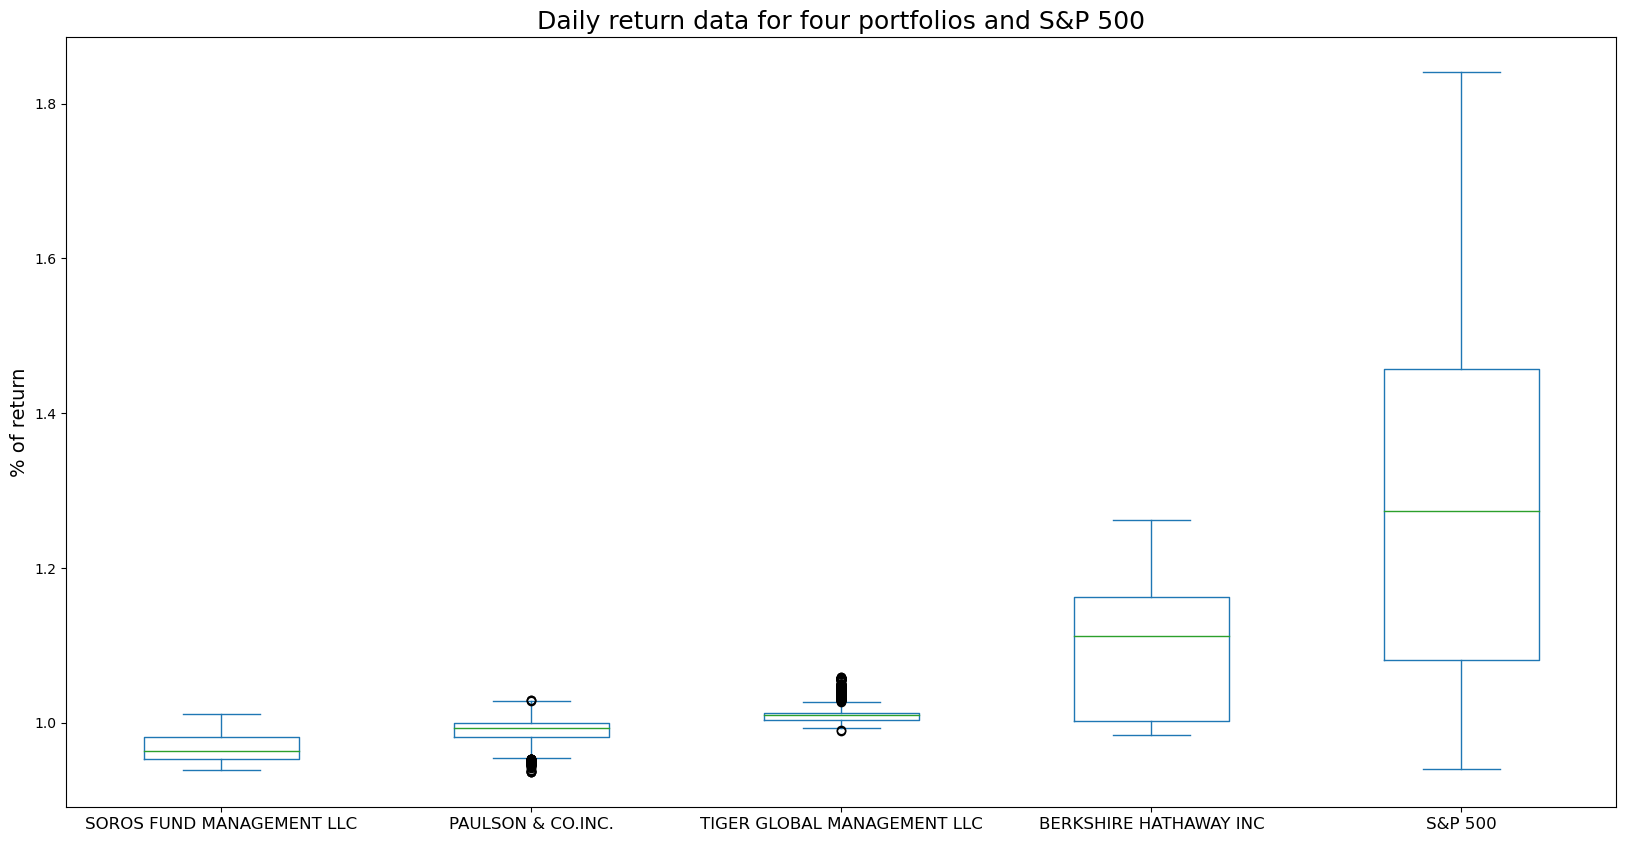

In [60]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
ax = daly_returns_cumulative_df.plot(
        kind="box", 
        title="Daily return data for four portfolios and S&P 500", 
        legend=True,
        figsize=(20,10)
)

# Set titles and labels with initial sizes
ax.title.set_size(18)
ax.tick_params(axis='x',labelsize=12)
ax.set_ylabel('% of return', fontsize=14);


#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. 

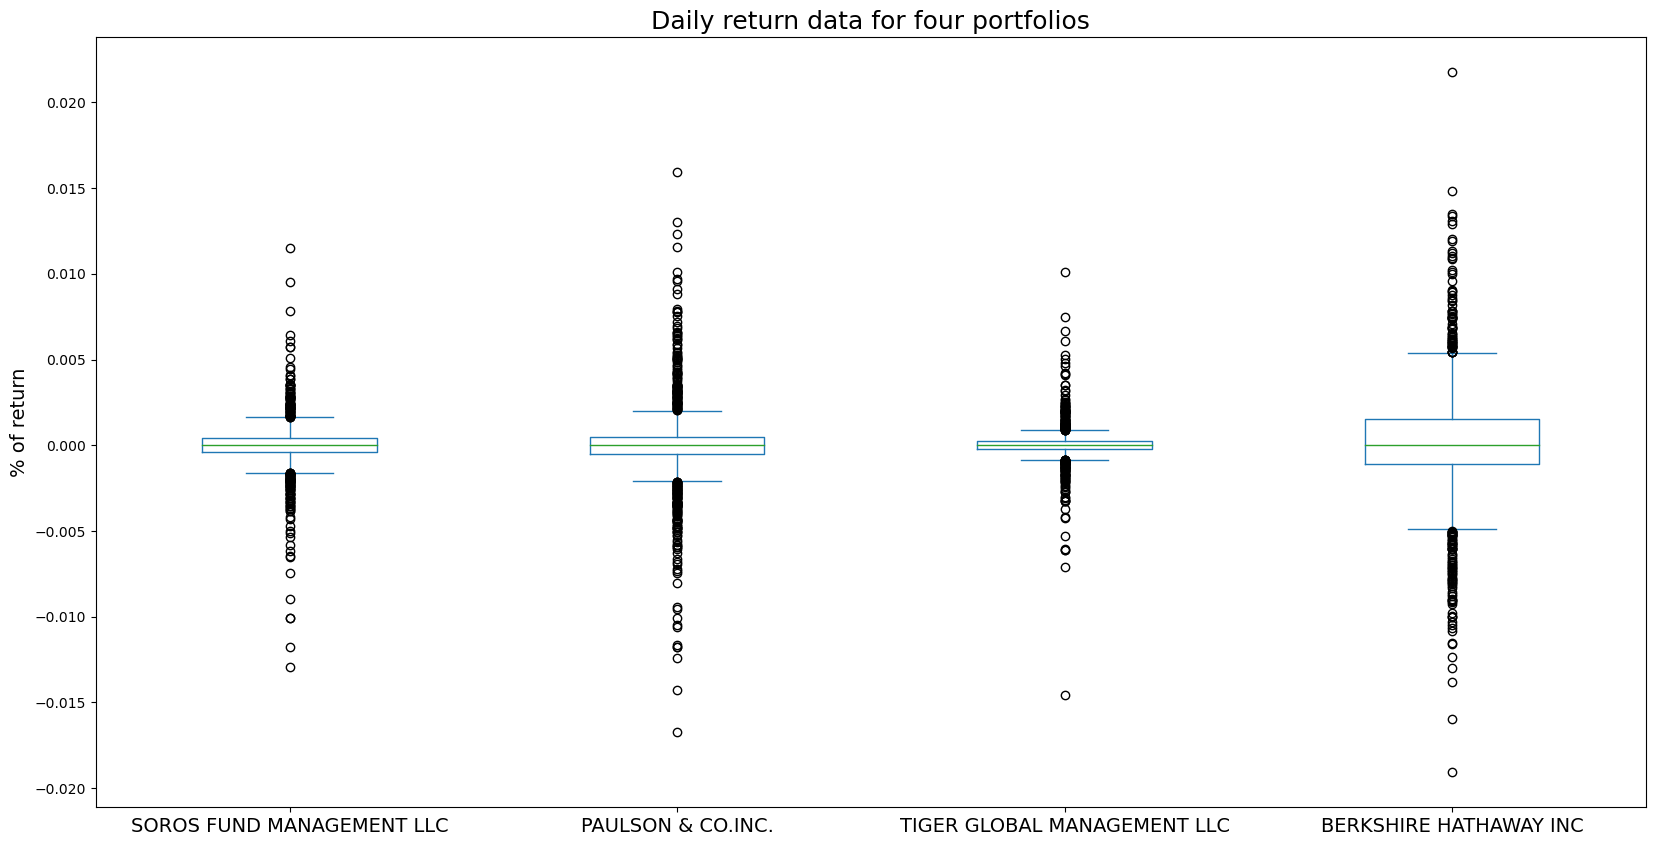

In [61]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
daly_returns_droped_snp_df = daly_returns_df.drop(columns=['S&P 500'])

# Create box plots to reflect the return data for only the 4 fund portfolios
ax = daly_returns_droped_snp_df.plot(
        kind="box", 
        title="Daily return data for four portfolios", 
        legend=True,
        figsize=(20,10)
)

# Set titles and labels with initial sizes
ax.title.set_size(18)
ax.tick_params(axis='x',labelsize=14)
ax.set_ylabel('% of return', fontsize=14);


#### Step 3: Answer the following question: 

**Question** : Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** : Based on the analysis of the data, it can be observed that the portfolio of Berkshire Hathaway Inc. exhibited the highest degree of volatility, while the portfolio of Tiger Global Management LLC demonstrated the least amount of volatility

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [62]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
daly_standard_deviation = daly_returns_df.std().sort_values()

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [63]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
annualized_standard_deviation = daly_returns_df.std() * np.sqrt(252)
annualized_standard_deviation

SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
TIGER GLOBAL MANAGEMENT LLC    0.015804
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index.

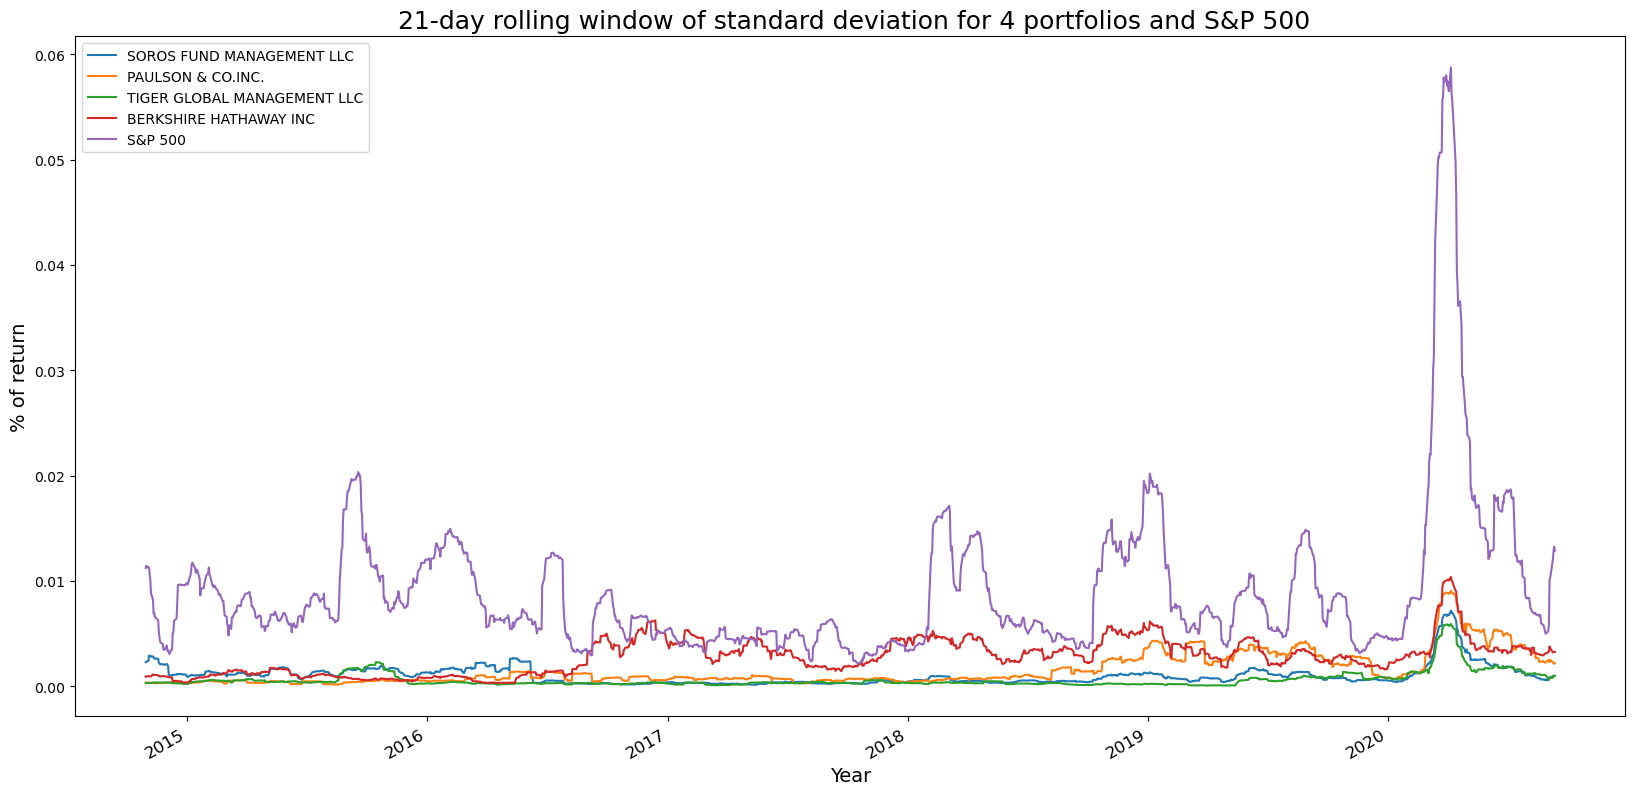

In [64]:
# Using the daily returns DataFrame and a 21-day rolling window.
annualized_standard_deviation_df = daly_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation of the 4 portfolios and the S&P 500 
ax = annualized_standard_deviation_df.plot(
         title=" 21-day rolling window of standard deviation for 4 portfolios and S&P 500", 
         legend=True,
         figsize=(20,10)
)

# Set titles and labels with initial sizes
ax.title.set_size(18)
ax.tick_params(axis='x',labelsize=12)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('% of return', fontsize=14);


#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. 

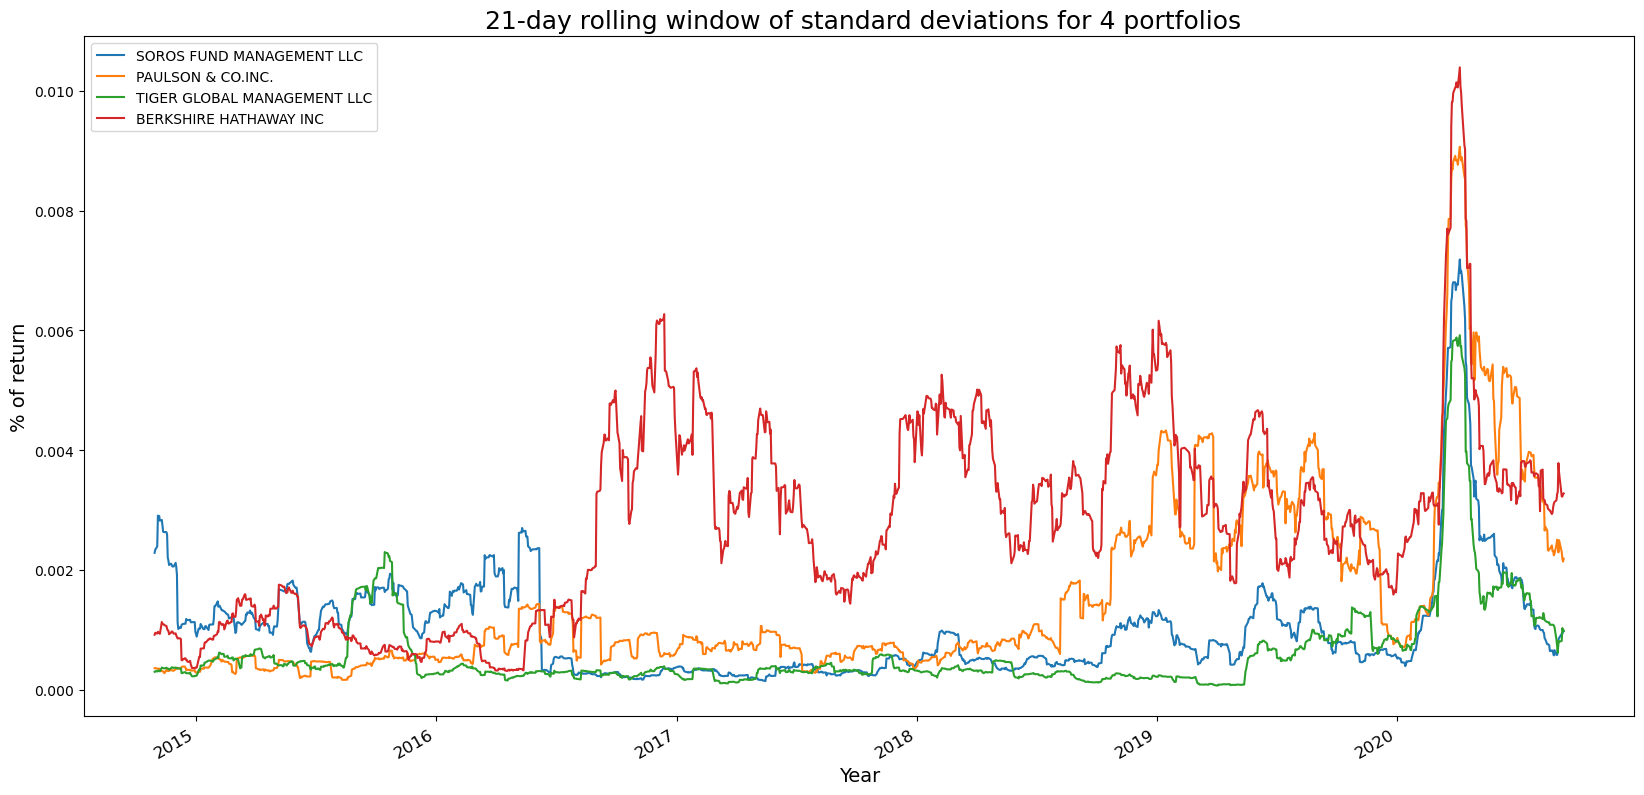

In [65]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
ax = annualized_standard_deviation_df.iloc[:,0:4].plot(
         title=" 21-day rolling window of standard deviations for 4 portfolios", 
         legend=True,
         figsize=(20,10)
)

# Set titles and labels with initial sizes
ax.title.set_size(18)
ax.tick_params(axis='x',labelsize=12)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('% of return', fontsize=14);  


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1** : Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** : The analysis of annualized standard deviation indicates that the S&P 500 portfolio posed the highest level of risk, followed by Berkshire Hathaway Inc. in second place, Paulson & Co. Inc. in third place, Soros Fund Management LLC in fourth place, and the least risky portfolio was Tiger Global Management LLC.

**Question 2** : Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** : The analysis of rolling metrics indicates a low correlation between the risk of the S&P 500 portfolio and the other four portfolios for the period from 2015 to mid-2016. This low correlation persisted from mid-2016 to beginig of 2018. However, from 2018 to 2020, there was evidence of a slight positive correlation between the risk of the S&P 500 and Berkshire Hathaway Inc portfolios. In early 2020, there was a significant increase in the positive correlation of risk across all portfolios.


**Question 3** : Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** : The analysis of the rolling standard deviation of four portfolios, excluding the S&P 500, reveals that Soros Fund Management LLC posed a higher level of deviation during the period from 2015 to mid-2016. This was followed by Berkshire Hathaway Inc., and then by Tiger Global Management LLC, which experienced a significant spike in deviation towards the end of 2015. Paulson & Co. Inc. showed an increase in deviation by mid-2016.
From mid-2016 to the start of 2019, the deviation of Berkshire Hathaway Inc. rose the most, followed by a gradual increase in the deviation of Paulson & Co. Inc. During 2019, Berkshire Hathaway Inc. and Paulson & Co. Inc. remained in close proximity, with the latter declining by year-end. In early 2020, there was a significant spike in deviation for all four portfolios.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [66]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
annual_average_return = daly_returns_df.mean() * 252

# Review the annual average returns sorted from lowest to highest
# annual_average_return.
annual_average_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [67]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
sharp_ratio= annual_average_return / annualized_standard_deviation
sharp_ratio.sort_values()


PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart.

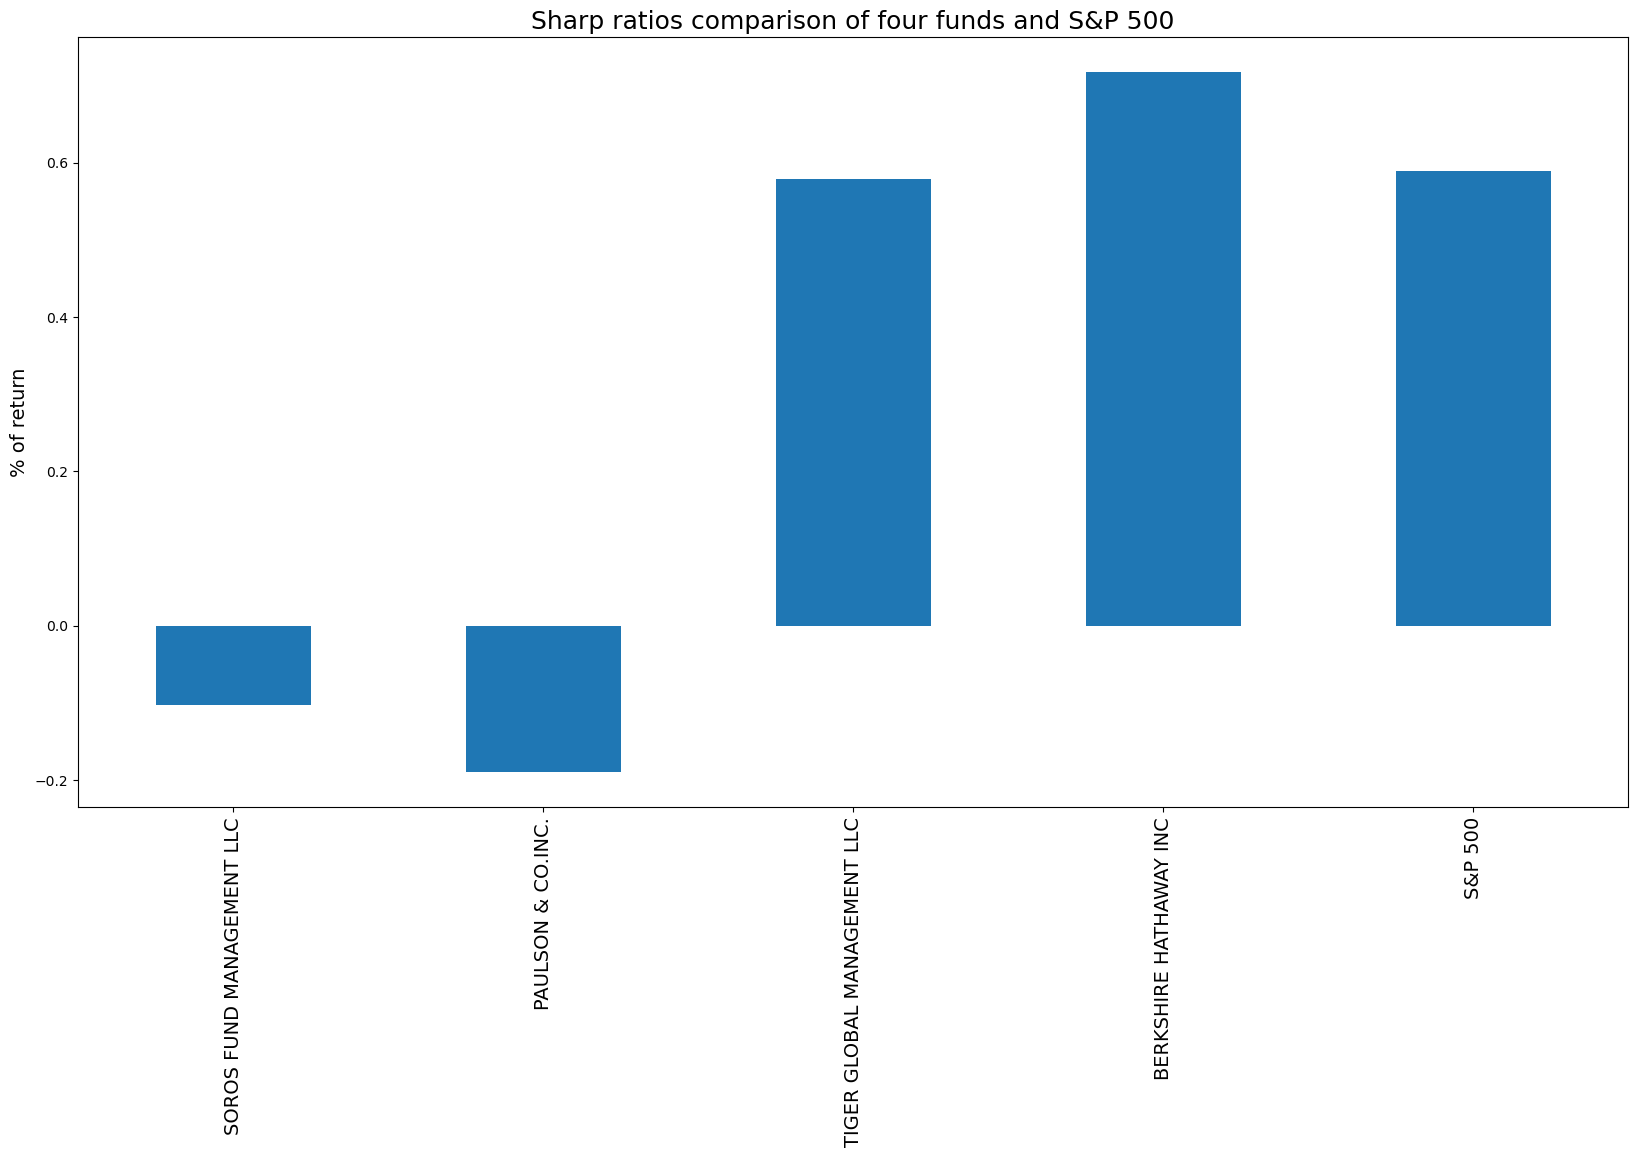

In [73]:
# Visualize the Sharpe ratios as a bar chart and sort values 
ax = sharp_ratio.plot(
        kind="bar", 
        title="Sharp ratios comparison of four funds and S&P 500", 
        legend=False,
        figsize=(20,10)
)

# Set titles and labels with initial sizes
ax.title.set_size(18)
ax.tick_params(axis='x',labelsize=14)
ax.set_ylabel('% of return', fontsize=14);

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** : The Sharpe ratio analysis indicates that Berkshire Hathaway Inc. has the most favorable risk-return profile, while Paulson & Co. Inc. has the least favorable profile.

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [74]:
# Calculate the variance of the S&P 500 using a rolling 60-day window, remove missing values.
variance_60_days_snp = daly_returns_df['S&P 500'].rolling(window=60).var().dropna()

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. 

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [81]:
# Calculate the covariance between BERKSHIRE HATHAWAY INC and S&P 500 using a 60-day rolling window, remove missing values.
covariance_60_days_berkshire = daly_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daly_returns_df['S&P 500']).dropna()

# Review the last five rows of the covariance data
covariance_60_days.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [79]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
beta_60_days_berkshire = covariance_60_days_berkshire / variance_60_days_snp 

# Review the last five rows of the beta information
beta_60_days_berkshire.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [77]:
# Calculate the average of the 60-day rolling beta
beta_60_days_berkshire.mean()

0.2214986101354593

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. 

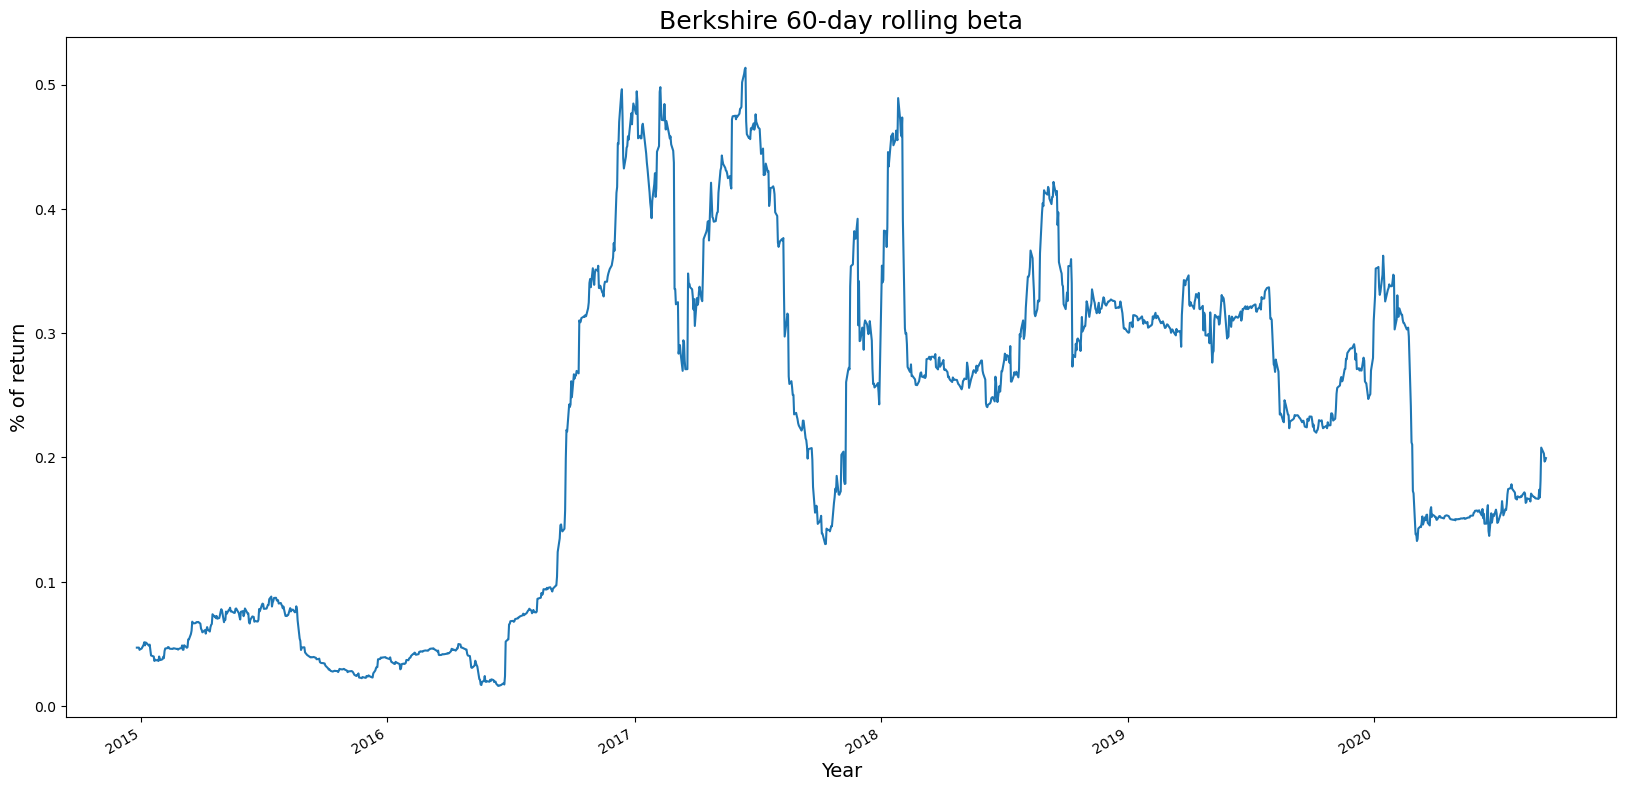

In [80]:
# Plot the rolling beta 
ax = beta_60_days_berkshire.plot(
     figsize=(20,10), 
     title='Berkshire 60-day rolling beta'
)

# Set titles and labels with initial sizes
ax.title.set_size(18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('% of return', fontsize=14);

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [82]:
# Calculate the covariance between TIGER GLOBAL MANAGEMENT LLC and S&P 500 using a 60-day rolling window, remove missing values.
covariance_60_days_tiger_global = daly_returns_df['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daly_returns_df['S&P 500']).dropna()

# Review the last five rows of the covariance data
covariance_60_days_tiger_global.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [83]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
beta_60_days_tiger_global = covariance_60_days_tiger_global / variance_60_days_snp 

# Review the last five rows of the beta information
beta_60_days_tiger_global.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [84]:
# Calculate the average of the 60-day rolling beta
beta_60_days_tiger_global.mean()

0.03093001487238774

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

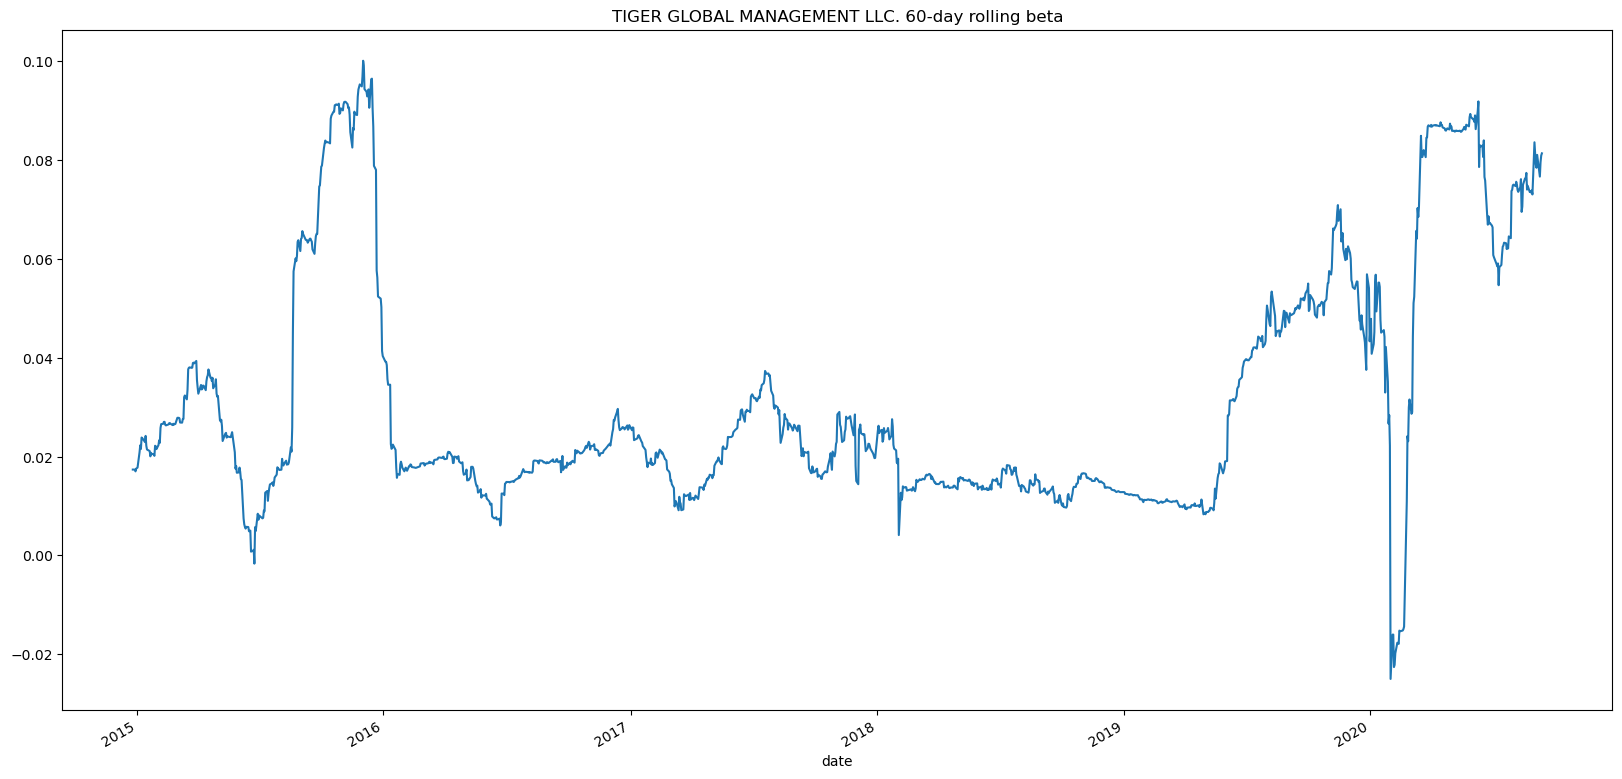

In [85]:
# Plot the rolling beta 
beta_60_days_tiger_global.plot(
     figsize=(20,10), 
     title='TIGER GLOBAL MANAGEMENT LLC. 60-day rolling beta'
)

# Set titles and labels with initial sizes
ax.title.set_size(18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('% of return', fontsize=14);



#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** : According to the 60-day rolling beta analysis of the two highest-performing portfolios, Berkshire Hathaway Inc. appears to be more sensitive to movements in the S&P 500


**Question 2** : Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** : Based on the analysis of the two portfolios, i would recomend to invest in Berkshire Hathaway Inc. portfolio due to its higher Sharpe ratio and superior beta.

---